### Lets see what the hidden layers outputs look like for a simple NN solving the XOR problem



In [177]:
#Imports 
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Lets make our mode:

In [178]:
class NNet(nn.Module):
    def __init__(self):
        super(NNet, self).__init__()
        self.hidden = nn.Linear(2, 2)
        self.output = nn.Linear(2, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        h = self.relu(self.hidden(x))
        o = self.output(h)
        return o, h #we also return the h so that we can then look at the hidden layer outputs

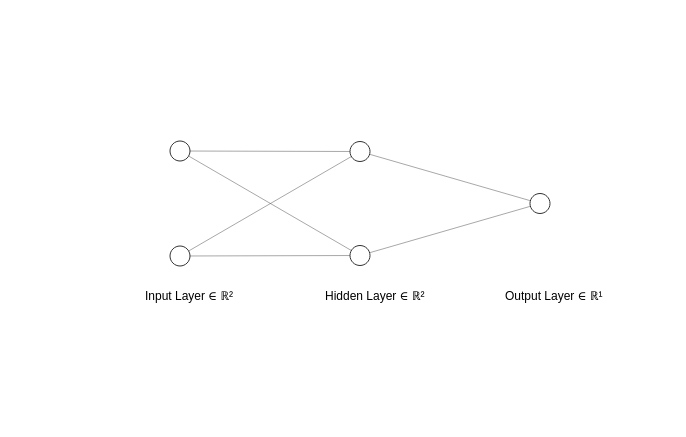

Lets make our data:

In [179]:
# Original points in XOR
X = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float)
Y = torch.tensor([[0], [1], [2], [3]], dtype=torch.float)

In [180]:
# initalize the network
model = NNet()

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

Now its time to Train!!

In [181]:
epochs = 1000
for epoch in range(epochs):
    optimizer.zero_grad()
    pred, _ = model(X)
    if epoch == 999:
        print(pred)
    loss = criterion(pred, Y)
    loss.backward()
    optimizer.step()

    if (epoch) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')


Epoch [1/1000], Loss: 2.8787
Epoch [101/1000], Loss: 0.9769
Epoch [201/1000], Loss: 0.4964
Epoch [301/1000], Loss: 0.1330
Epoch [401/1000], Loss: 0.0213
Epoch [501/1000], Loss: 0.0054
Epoch [601/1000], Loss: 0.0017
Epoch [701/1000], Loss: 0.0006
Epoch [801/1000], Loss: 0.0002
Epoch [901/1000], Loss: 0.0001
tensor([[0.0117],
        [0.9983],
        [1.9995],
        [3.0001]], grad_fn=<AddmmBackward0>)


**We printed out the values of our last predictions from the neural network (NN).**

| Binary | Prediction Value |
|--------|-------------------|
| `00`   | `0.0117`         |
| `01`   | `0.9983`         |
| `10`   | `1.9995`         |
| `11`   | `3.0001`         |

Now lets vizualize what our network looks like.

In [189]:
#define the domain for the function
x = torch.linspace(0, 1, 100)
y = torch.linspace(0, 1, 100)
x_grid, y_grid = torch.meshgrid(x, y)
xy_grid = torch.stack((x_grid.flatten(), y_grid.flatten()), dim=1)

In [ ]:
import plotly.graph_objects as go

with torch.no_grad():
    output, hidden = model(xy_grid)


output = output.reshape(100, 100)
hidden1 = hidden[:, 0].reshape(100, 100)
hidden2 = hidden[:, 1].reshape(100, 100)


x_grid_np = x_grid.numpy()
y_grid_np = y_grid.numpy()
hidden1_np = hidden1.numpy()
hidden2_np = hidden2.numpy()
output_np = output.numpy()

width = 650
height = 850

zoom_out_camera = dict(
    eye=dict(x=1.5, y=1.5, z=1.5)  # up in values to zoom out further
)

#hidden node 1
fig1 = go.Figure(data=[go.Surface(z=hidden1_np, x=x_grid_np, y=y_grid_np, colorscale='Viridis')])
fig1.update_layout(
    title="Hidden Node 1",
    width=width,
    height=height,
    scene=dict(
        xaxis_title='Input X',
        yaxis_title='Input Y',
        zaxis_title='Activation',
        camera=zoom_out_camera  # Apply zoom-out effect
    )
)

#hidden node 2
fig2 = go.Figure(data=[go.Surface(z=hidden2_np, x=x_grid_np, y=y_grid_np, colorscale='Viridis')])
fig2.update_layout(
    title="Hidden Node 2",
    width=width,
    height=height,
    scene=dict(
        xaxis_title='Input X',
        yaxis_title='Input Y',
        zaxis_title='Activation',
        camera=zoom_out_camera
    )
)

#output node
fig3 = go.Figure(data=[go.Surface(z=output_np, x=x_grid_np, y=y_grid_np, colorscale='Viridis')])
fig3.update_layout(
    title="Output",
    width=width,
    height=height,
    scene=dict(
        xaxis_title='Input X',
        yaxis_title='Input Y',
        zaxis_title='Output',
        camera=zoom_out_camera
    )
)

# Display the figures
fig1.show()
fig2.show()
fig3.show()